<a href="https://colab.research.google.com/github/puchee99/puchee99/blob/main/Stock_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
from datetime import datetime

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline



In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-03-15,3082.239990,3032.090088,3074.570068,3081.679932,2913600.0,3081.679932,AMAZON
2021-03-16,3128.909912,3075.860107,3104.969971,3091.860107,2510100.0,3091.860107,AMAZON
2021-03-17,3173.050049,3070.219971,3073.219971,3135.729980,3100900.0,3135.729980,AMAZON
2021-03-18,3116.629883,3025.000000,3101.000000,3027.989990,3649600.0,3027.989990,AMAZON
2021-03-19,3077.290039,3016.629883,3029.229980,3074.959961,4616400.0,3074.959961,AMAZON
2021-03-22,3126.580078,3060.050049,3067.850098,3110.870117,2902200.0,3110.870117,AMAZON
2021-03-23,3182.000000,3120.850098,3127.000000,3137.500000,3817300.0,3137.500000,AMAZON
2021-03-24,3160.310059,3085.149902,3151.040039,3087.070068,2959000.0,3087.070068,AMAZON
2021-03-25,3109.780029,3037.139893,3072.989990,3046.260010,3557300.0,3046.260010,AMAZON


In [4]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,109.289111,106.305889,107.875613,107.836591,1.376135e+08,107.522478
std,22.091924,21.436303,21.948452,21.722714,5.297503e+07,21.846026
min,61.287498,59.224998,60.084999,60.227501,2.105900e+07,59.764240
25%,91.330002,89.144997,90.175003,90.445000,9.938220e+07,89.992256
50%,116.750000,113.750000,115.489998,115.320000,1.256428e+08,114.989487
75%,125.389999,121.839996,124.050003,123.989998,1.655652e+08,123.970551
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.946396


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-03-26 to 2021-03-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          253 non-null    float64
 1   Low           253 non-null    float64
 2   Open          253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    float64
 5   Adj Close     253 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


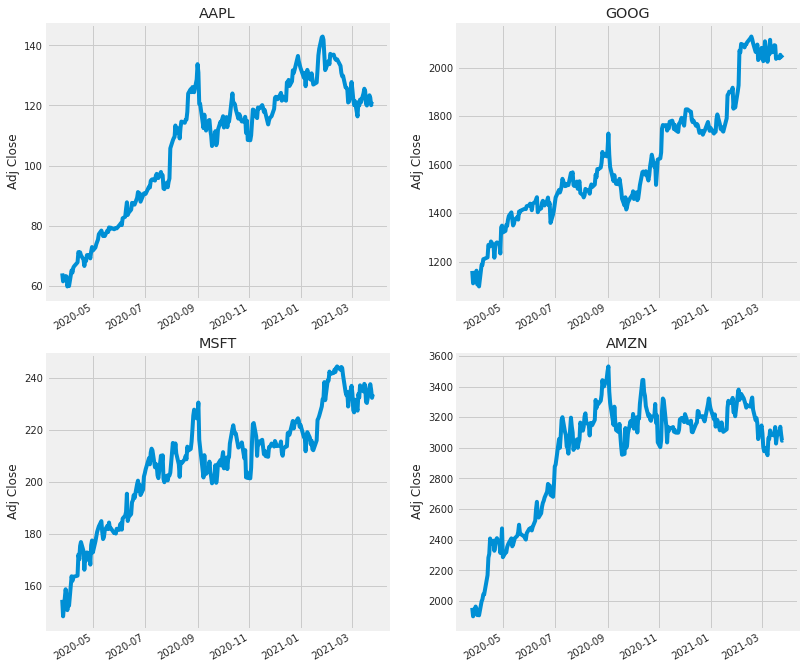

In [6]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

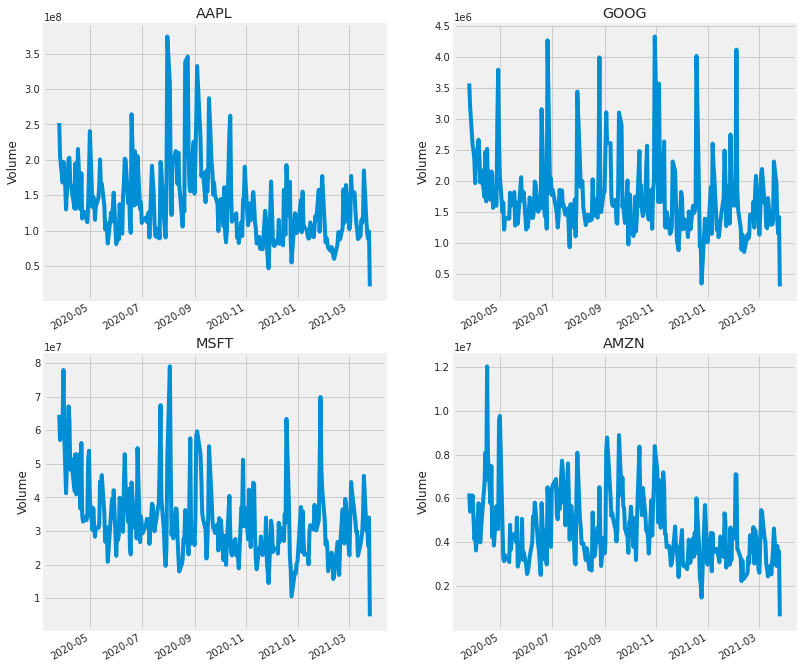

In [7]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

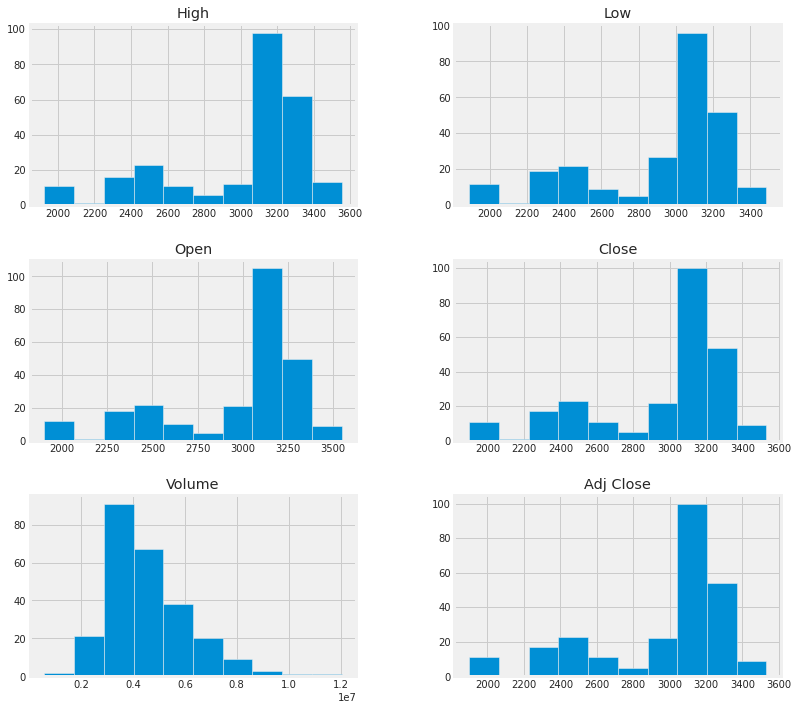

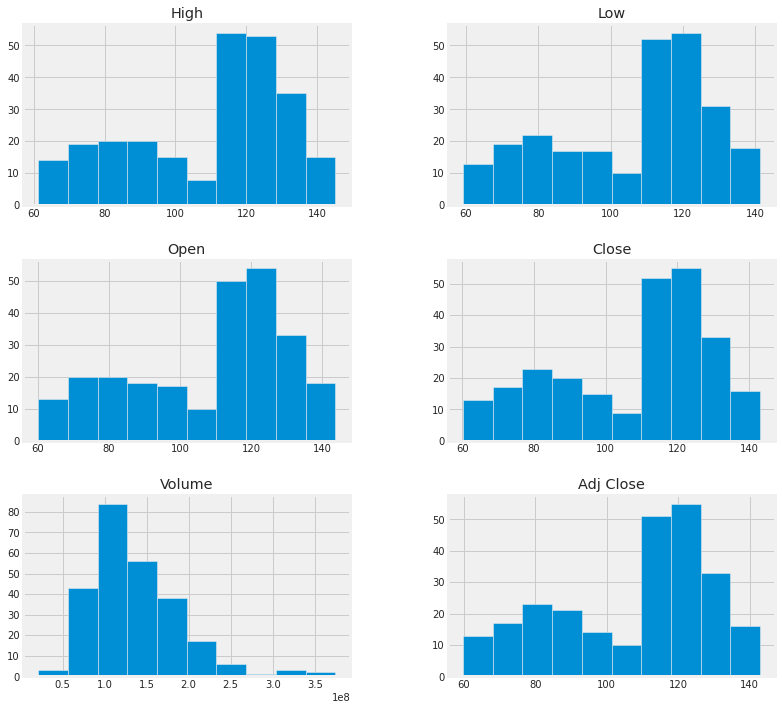

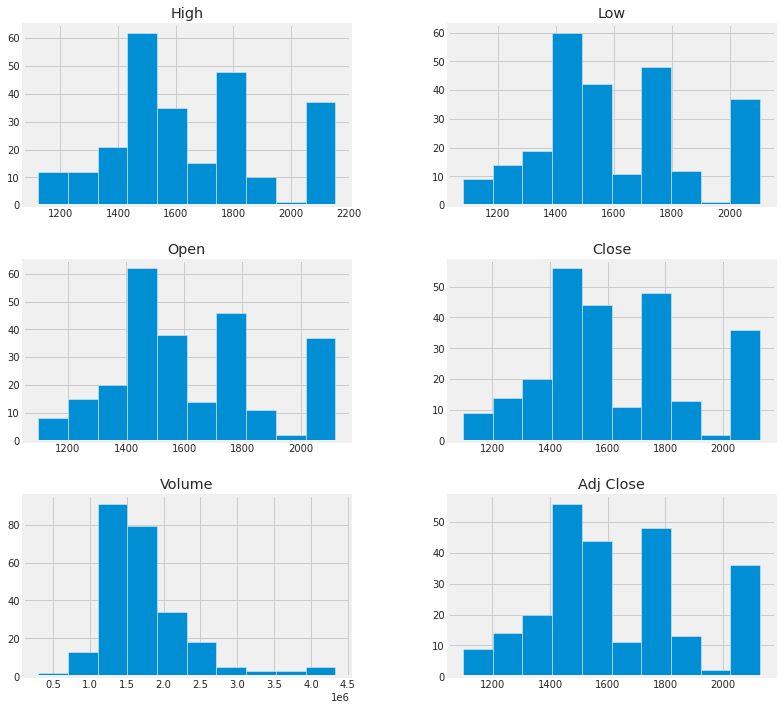

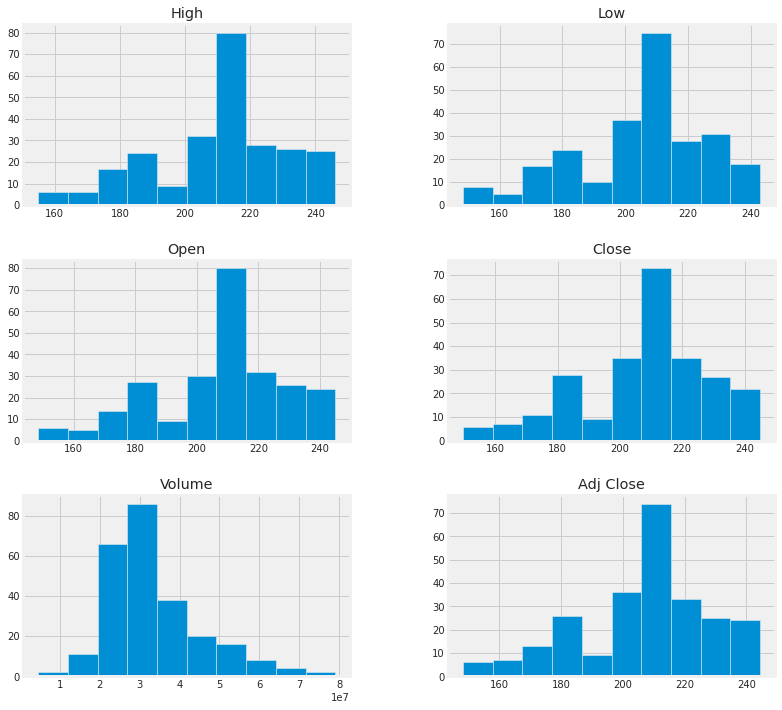

In [9]:
df.groupby("company_name").hist(figsize=(12, 12));

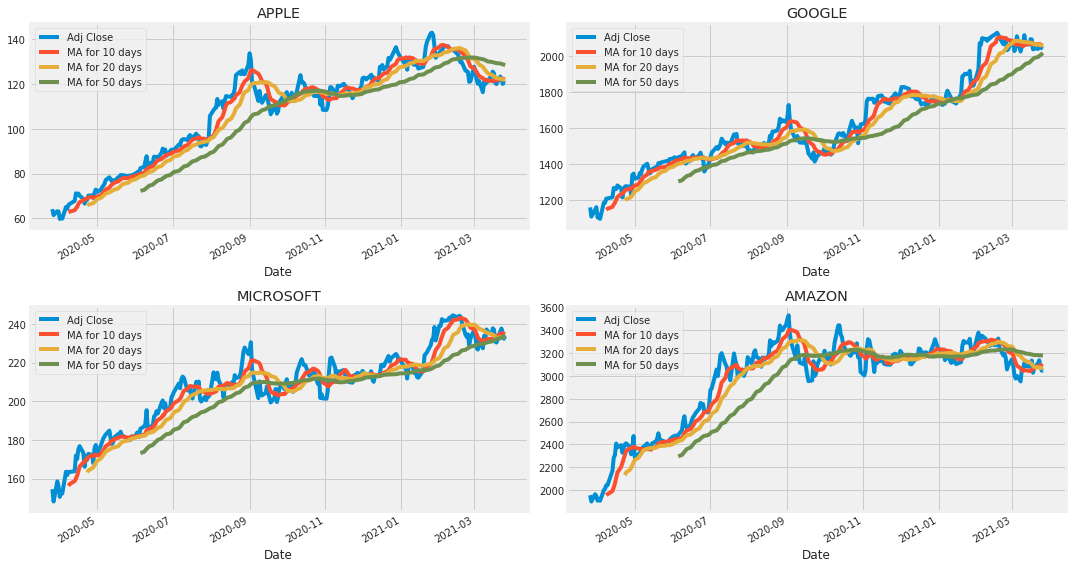

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

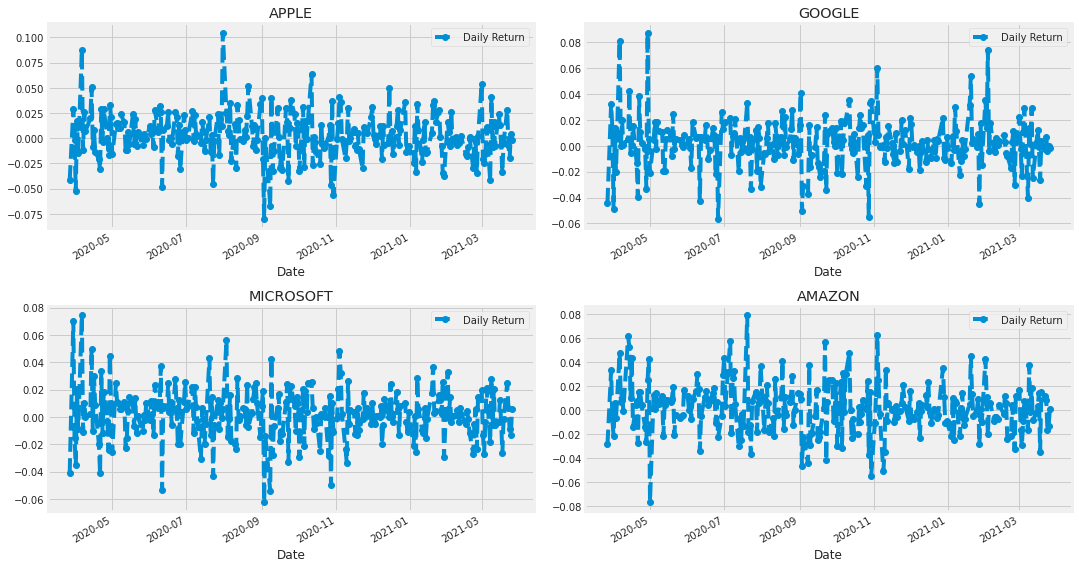

In [11]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

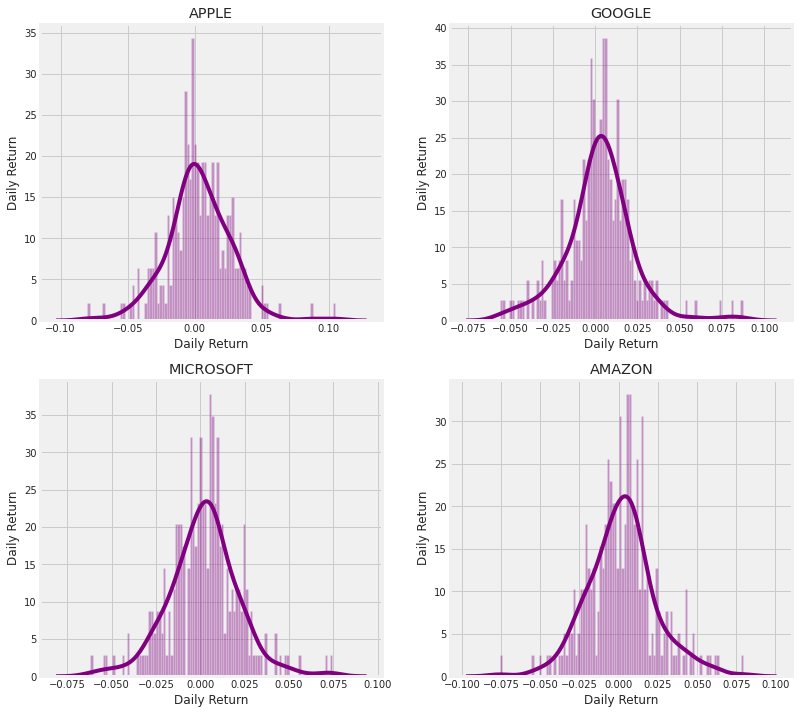

In [12]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()

In [13]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-03-26,64.113029,1161.750000,154.539566,1955.489990
2020-03-27,61.458603,1110.709961,148.194046,1900.099976
2020-03-30,63.212502,1146.819946,158.618118,1963.949951
2020-03-31,63.083504,1162.810059,156.123474,1949.719971
2020-04-01,59.764240,1105.619995,150.579803,1907.699951


In [14]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-03-26,NaN,NaN,NaN,NaN
2020-03-27,-0.041402,-0.043934,-0.041061,-0.028325
2020-03-30,0.028538,0.032511,0.070341,0.033603
2020-03-31,-0.002041,0.013943,-0.015727,-0.007246
2020-04-01,-0.052617,-0.049183,-0.035508,-0.021552


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


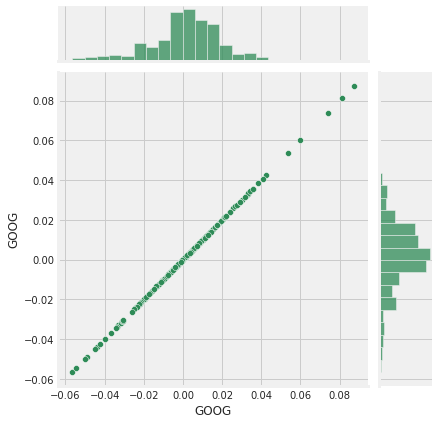

In [16]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


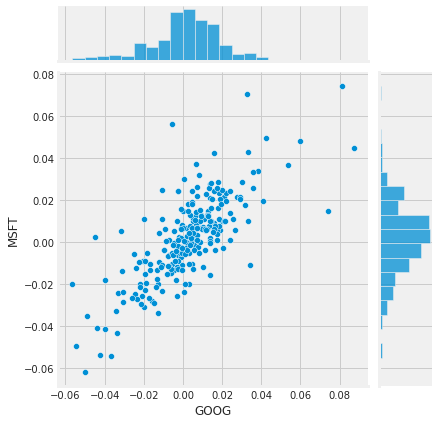

In [17]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

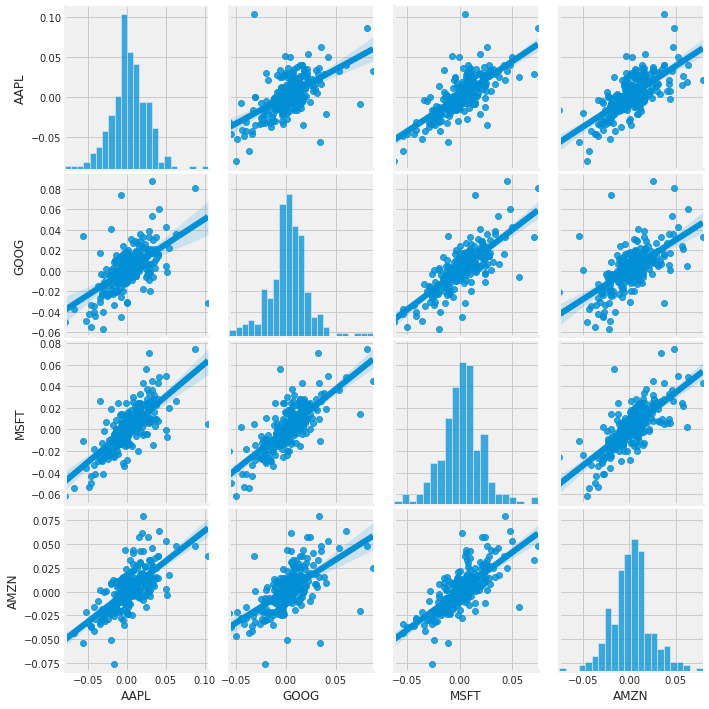

In [18]:

sns.pairplot(tech_rets, kind='reg')

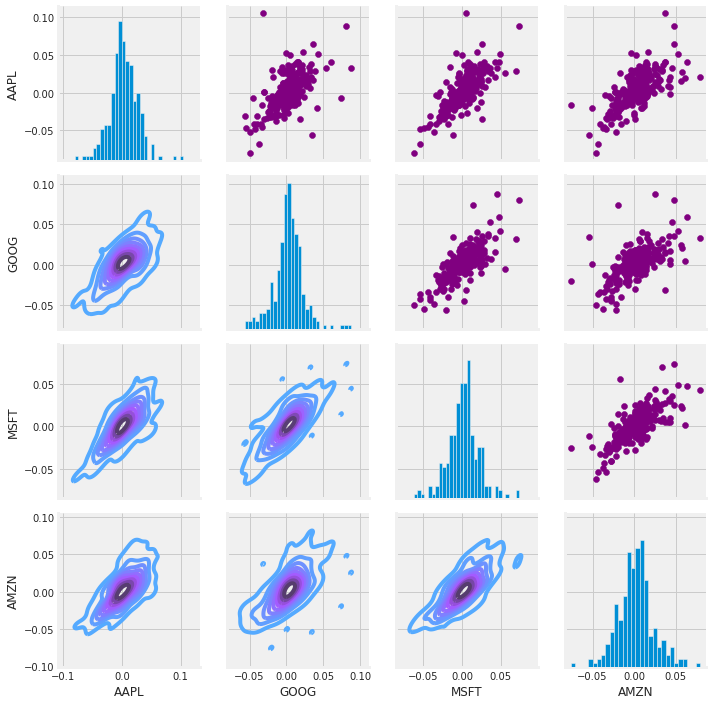

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

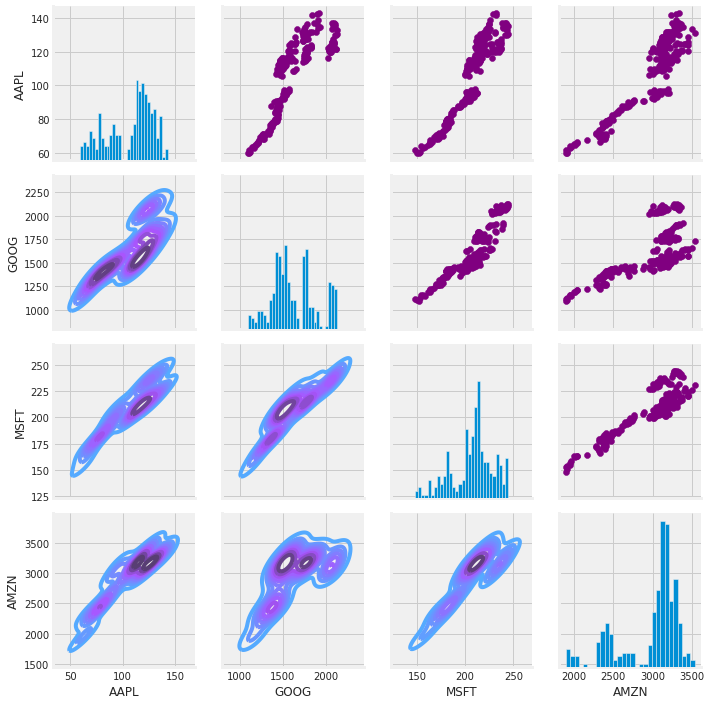

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

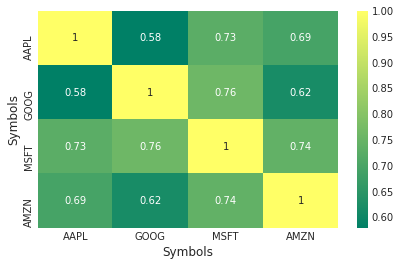

In [21]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')



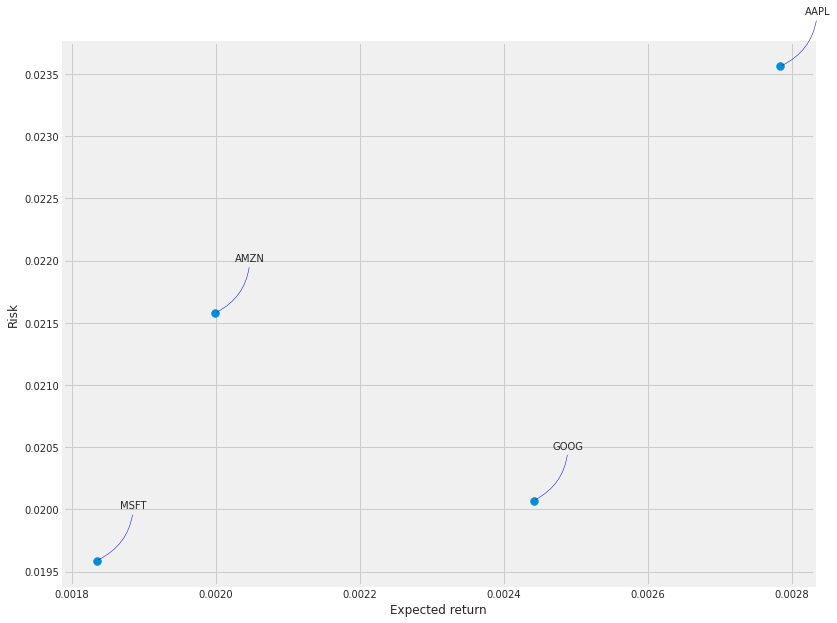

In [22]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [23]:
#Get the stock quote
df = DataReader('GC=F', data_source='yahoo', start='2012-01-01', end=datetime.now()) #AAPL
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1604.300049,1566.000000,1568.900024,1599.699951,229.0,1599.699951
2012-01-04,1618.599976,1594.500000,1596.599976,1611.900024,172.0,1611.900024
2012-01-05,1624.099976,1597.800049,1610.800049,1619.400024,362.0,1619.400024
2012-01-06,1627.800049,1616.099976,1622.500000,1616.099976,20.0,1616.099976
2012-01-09,1620.099976,1607.500000,1614.300049,1607.500000,8.0,1607.500000
...,...,...,...,...,...,...
2021-03-22,1737.800049,1737.800049,1737.800049,1737.800049,51.0,1737.800049
2021-03-23,1724.699951,1724.699951,1724.699951,1724.699951,6.0,1724.699951
2021-03-24,1732.900024,1727.500000,1727.500000,1732.900024,26.0,1732.900024


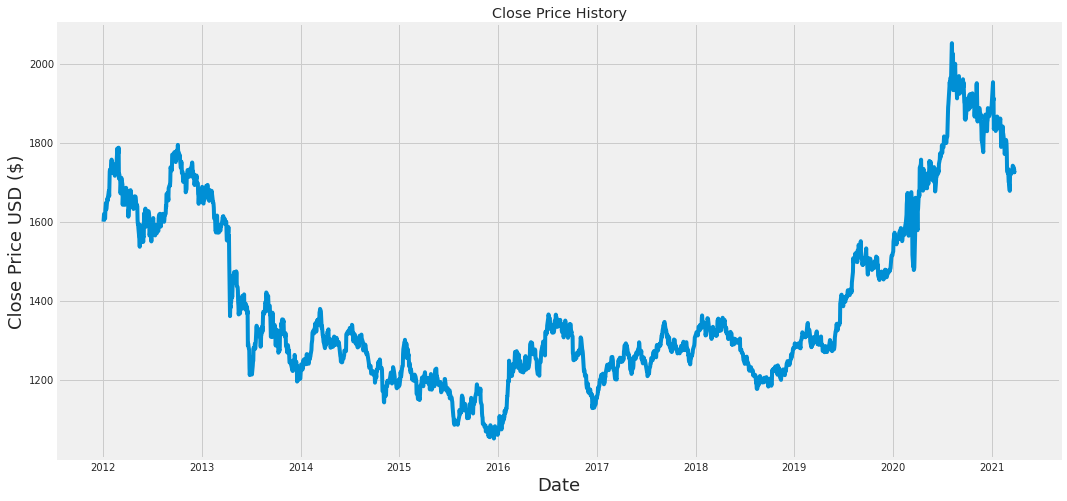

In [24]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

##PYTRENDS --> GOOGLE TRENDS

In [26]:
!pip install pytrends

In [27]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US')
keys = ['Bitcoin',"Tesla","Apple","Gold","Oil"]
timeframes=['today 5-y', 'today 1-m','2014-1-14 2017-01-25','all']
cat="0"
geo=""
gprop=""
pytrends.build_payload(keys,
                      cat,
                      timeframes[2],
                      geo,
                      gprop)

No handles with labels found to put in legend.


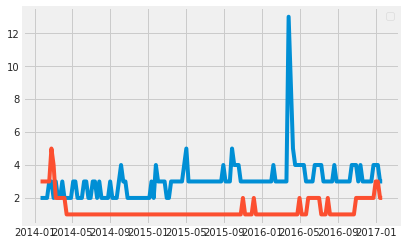

In [28]:
data = pytrends.interest_over_time()
plt.plot(data['Tesla'])
plt.plot(data['Bitcoin'])
plt.legend()

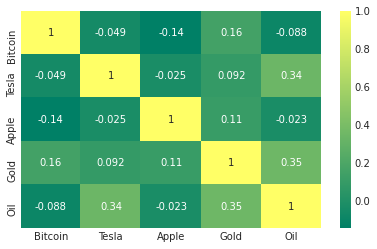

In [29]:
#data['Tesla']
data = data.drop(['isPartial'],axis=1)
sns.heatmap(data.corr(), annot=True, cmap='summer')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


(31,)

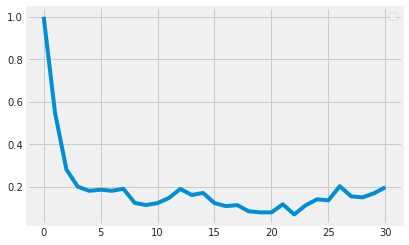

In [30]:
import statsmodels.api as sm
corr = sm.tsa.stattools.acf(data['Tesla'],nlags=30)
#corr2 = sm.tsa.stattools.acf(train['Close'])
plt.plot(corr)
#plt.plot(corr2)
plt.legend()
corr.shape



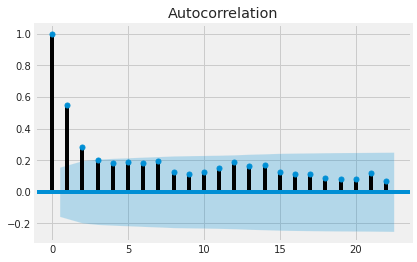

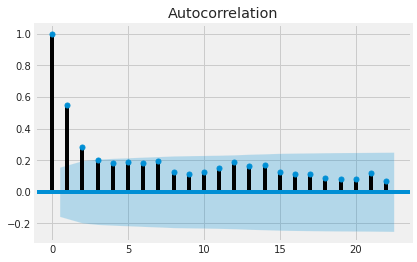

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Tesla'])

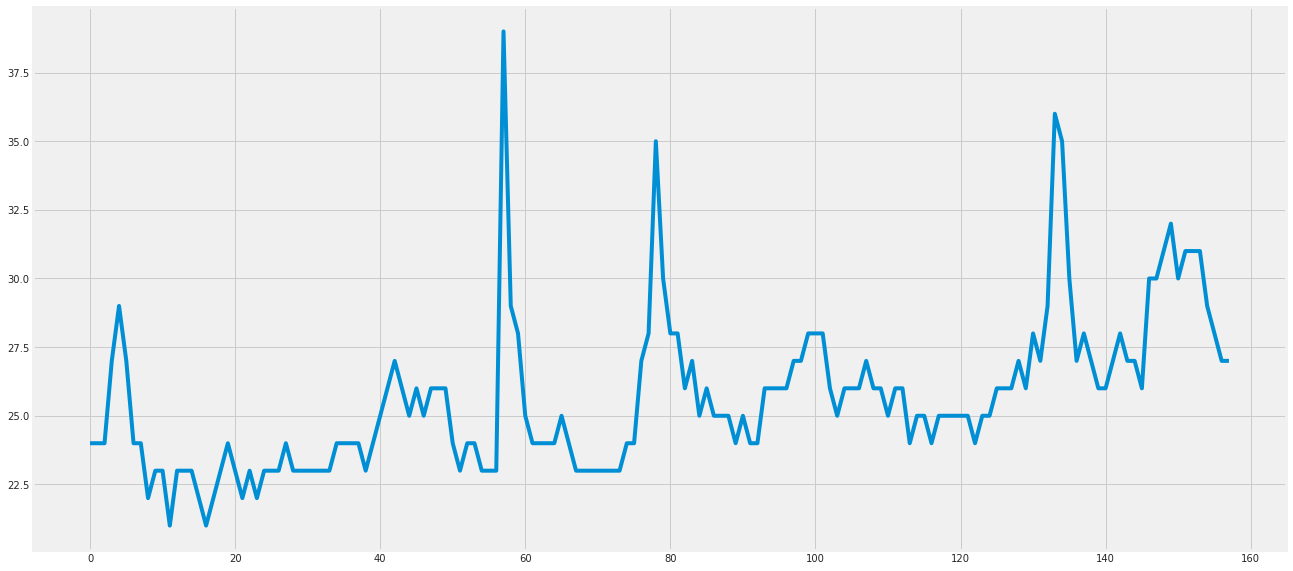

In [32]:
data_a = data['Gold'].to_numpy()#.T[0]

plt.figure(figsize=(20,10))
plt.plot(data_a)



<Figure size 1440x720 with 0 Axes>

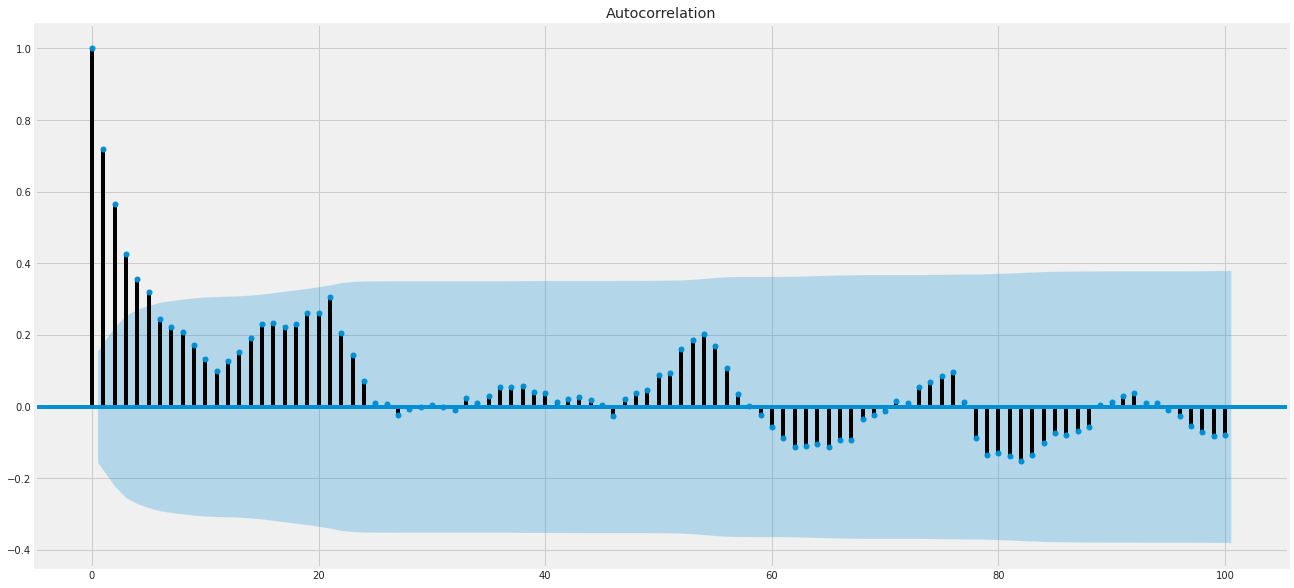

'\nWhat you can see here are bars and a horizontal cone. \nThis cone pictures the confidence level (by default set to 95%). \nIn other words, if the point is outside the cone (on white) you may say that with 95% probability \nis has a certain impact on values. If the bar is inside the cone (on blue) you may ignore this particular \nlag as most likely it is not relevant.\n\nx bar has a height of 0.75. \nThis means that current data will impact data in 11 month by 75% (data resolution is monthly).\n\nUna autocorrelación negativa implica que si un valor pasado está por encima del promedio, \nes más probable que el valor más nuevo esté por debajo del promedio (o al revés). \nEn este caso particular, si hoy (este mes) observamos un número de manchas solares superior al promedio, \npodríamos decir que con un 40% de probabilidad (-0,4 en el eje y) en 60 meses observaríamos menos manchas \nsolares que en promedio.\n'

In [33]:
plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_acf(data_a,lags=100)#, lags=50)
plt.show()

"""
What you can see here are bars and a horizontal cone. 
This cone pictures the confidence level (by default set to 95%). 
In other words, if the point is outside the cone (on white) you may say that with 95% probability 
is has a certain impact on values. If the bar is inside the cone (on blue) you may ignore this particular 
lag as most likely it is not relevant.

x bar has a height of 0.75. 
This means that current data will impact data in 11 month by 75% (data resolution is monthly).

Una autocorrelación negativa implica que si un valor pasado está por encima del promedio, 
es más probable que el valor más nuevo esté por debajo del promedio (o al revés). 
En este caso particular, si hoy (este mes) observamos un número de manchas solares superior al promedio, 
podríamos decir que con un 40% de probabilidad (-0,4 en el eje y) en 60 meses observaríamos menos manchas 
solares que en promedio.
"""